In [1]:
#run this cell if you want to be able to autoreload packages
#(meaning that you don't have to restart the kernal when you make changes to code)

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import time
import ZeroLevel_Qontrol as q0
import FirstLevel_Qontrol as q1
import SecondLevel_Qontrol as q2
from powermeter import Powermeter as PM
import heater_dict as hd
import heater_characterisation_funcs as hcf
from tunicsqontrol import tunics

pi=np.pi

In [3]:
# powermeter1 = Powermeter('PM100USB', serial='P2003916', unit='dBm', wavelength=1550) 
unit='dBm'
wavelength=1550
#Alice (tele) powermeters 10/03/20:
PMa = PM('PM100USB', serial='P2008115')
PMb = PM('PM100USB', serial='P2010371') 
PMc = PM('PM100USB', serial='P2003683') 
PMd = PM('PM100USB', serial='P2007347')
#Charlie powermeters 10/03/20:
PMe = PM('PM100USB', serial='P2005653')
PMf = PM('PM100USB', serial='P2010372') 
PMg = PM('PM100USB', serial='P2008116') 
PMh = PM('PM100USB', serial='P2007346')

In [4]:
serial_port_name = 'COM11'
mytunics = tunics(serial_port_name = serial_port_name)


Connected to Tunics laser on serial port COM11



In [5]:
mytunics.close()

In [5]:
"""serial_port_name_qontrol = 'COM3'
q = q0.QXOutput(serial_port_name=serial_port_name_qontrol, response_timeout=0.1)
heaters = q1.HeaterQontrol(q, uep.heater_dict, default_max_v=7)"""
h=q2.heater_class(hd.board_list,hd.heaters)

In [6]:
p_wavelength = 1549.3
i_wavelength = 1558.98
s_wavelength = 1539.77

0.15208573343416795 1.181313240765637 0.0003022042222847627 -2.0835707723954734e-06
fit visibility = -145.04149620860713
data visibility = 0.9963038138229647


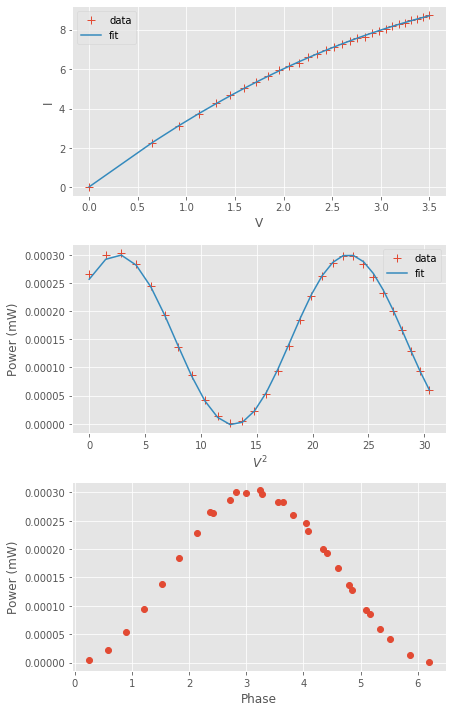

In [16]:
#Getting power curves from calibration
mytunics.laser_wavelength(s_wavelength)
mytunics.laser_switch('on')
time.sleep(2)
guess = [0.10,1,1e-3,1e-3]
phase_offset =0
phases_to_set={'BS1':pi, 'BS2':0, 'WDM1':0, 'Prj_RY1':pi, 'Attb1':pi, 'MZIb1':pi}

#background_voltage =0
sleep=0.5
voltages, currents, alpha, beta, gamma, powers_mW, c, phi_0, A, B = hcf.characterise_heater(h, PMf, "MZIb3", phases_to_set, v_max=3.5, sleep=sleep, phase_offset=phase_offset, fringe_fit_guess=guess,steps = 30)
print(f'fit visibility = {A/B}')
print(f'data visibility = {(powers_mW.max() - powers_mW.min())/(powers_mW.max() + powers_mW.min())}')
mytunics.laser_switch('off')

In [74]:
h.set_many_phases({'BS1':pi, 'BS2':0, 'WDM1':0, 'Prj_RY1':pi/2, 'Attb1':pi, 'Attb2':pi+0.3, 'MZIb1':pi/2, 'MZIb3':pi, 'MZIb4':pi})
phase=0
time_array,PMe_array,PMg_array=[],[],[]
for i in range(0, 1000):
    time_array.append(time.time())
    PMe_array.append(PMe.measure())
    PMg_array.append(PMg.measure())
    time.sleep(0.5)

    
saving_array = np.vstack((time_array, PMe_array, PMg_array)).T
np.savetxt(f'C:/Users/IT072488-admin/University of Bristol/grp-Multi 3 Chip Project - Multi_3_Chips/pycode_molly/Experimental code/Experimental data/Interference/drift_over_time_{int(time.time())}.csv', saving_array,delimiter=',', header='#time,output_1,output_2')

In [10]:
h.set_many_phases({'BS1':pi, 'BS2':0, 'WDM1':0, 'Prj_RY1':pi, 'Attb1':pi, 'Attb2':pi+0.3, 'MZIb1':pi/2, 'MZIb3':pi, 'MZIb4':pi})

In [8]:
mytunics.laser_switch('on')
mytunics.laser_wavelength(s_wavelength)

In [11]:
print(round(PMe.measure(),3),round(PMf.measure(),3),round(PMg.measure(),3),round(PMh.measure(),3))

-37.474 -71.497 -34.388 -85.917


In [35]:
print(time.time())

1584447765.0491784
